In [1]:
import numpy as np
import sympy 
from sympy import *
from sympy.physics.vector.printing import vlatex
from IPython.display import Math, display

In [2]:
init_printing()

In [3]:
def dotprint(expr):
    display(Math(vlatex(expr)))

In [4]:
# first example, single link arm

In [5]:
t = symbols('t')
theta = symbols('\\theta', cls=Function)
theta = theta(t)
theta

In [6]:
theta_dot = theta.diff(t)
theta_dot

In [7]:
el, m , g, P_0, tau, b = symbols(" \\ell, m, g, P_0, \\tau, b")

In [8]:
# kinetic
k = (1/6)*m*el**2*theta_dot**2
k

In [9]:
# potential
p = P_0 + m*g*(1/2)*el*sin(theta)
p

In [10]:
# dampening
GD = -b*theta_dot
GD

In [11]:
L = k - p
L.simplify()

In [12]:
def derive_lagrangian(L, q, q_dot):
    term_1 = (L.diff(q_dot).diff(t))
    term_2 = (L.diff(q))
    return term_1 - term_2

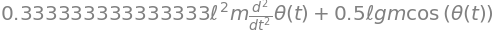

In [13]:
derive_lagrangian(L, theta, theta_dot)

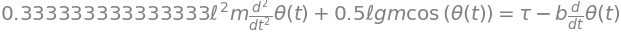

In [14]:
Euler_lagrange = Eq(derive_lagrangian(L, theta, theta_dot), tau - b*theta_dot)
Euler_lagrange

In [15]:
# second example, pendulum on cart

In [16]:
t = symbols('t')
theta = symbols("\\theta", cls=Function)
z = symbols("z", cls=Function)
theta = theta(t)
z = z(t)

In [17]:
theta_dot = theta.diff(t)
z_dot = z.diff(t)

In [18]:
el, m1, m2, g, y, P_0, P, F, b = symbols("\\ell, m_1, m_2, g, y, P_0, P, F, b")

In [43]:
# linear + rotational
k = (1/2)*(m1 + m2)*z_dot**2 + 1/2*m1*(el**2)/3*theta_dot**2 + 1/2*m1*el*z_dot*theta_dot*cos(theta)

In [44]:
# potential
p = P_0 + m1*g*(el/2)*(cos(theta) - 1)

In [ ]:
# generalized force
tau = F.T

AttributeError: 'Symbol' object has no attribute 'T'

In [ ]:
# generalized dampening
GD = -b*theta_dot

In [ ]:
# langrangian
L = k + p

In [ ]:
# euler lagrangian fcn
def derive_lagrangian(L, q, q_dot):
    term_1 = (sympy.tensor.derive_by_array(L, q_dot)).diff(t)
    term_2 = sympy.tensor.derive_by_array(L,q)
    return term_1 - term_2

In [ ]:
derive_lagrangian(L, (z,theta), (z_dot,theta_dot))

In [ ]:
Euler_lagrange = Eq(derive_lagrangian(L, (z,theta), (z_dot,theta_dot)), tau-